In [1]:
from SuPyModes.Geometry          import Geometry, Circle, Fused3
from SuPyModes.Solver            import SuPySolver
from SuPyModes.sellmeier         import Fused_silica
from SuPyModes.utils             import *
from SuPyModes.perso             import FiberA, FiberB

A, B = FiberA(wavelength=1.3), FiberB(wavelength=1.3)

Capillary = Circle( Position = [0,0], Radi = 140, Index = 1.433,  )

Clad = Fused3(Radius =  62.5, Fusion  = 0.8, Index   = Fused_silica(1.55), debug='WARNING')


Clad0 = Circle( Position = Clad.C[0], Radi = A.rClad, Index = A.nClad )
Clad1 = Circle( Position = Clad.C[1], Radi = A.rClad, Index = A.nClad )
Clad2 = Circle( Position = Clad.C[2], Radi = B.rClad, Index = B.nClad )


Core0 = Circle( Position = Clad.C[0], Radi = A.rCore, Index = A.nCore )
Core1 = Circle( Position = Clad.C[1], Radi = A.rCore, Index = A.nCore )
Core2 = Circle( Position = Clad.C[2], Radi = B.rCore, Index = B.nCore )


Geo = Geometry(Objects = [Capillary, Clad, Clad0, Clad1, Clad2, Core0, Core1, Core2],
               Xbound  = [-150, 150],
               Ybound  = [-150, 150],
               Nx      = 150,
               Ny      = 150,
               debug   = 'INFO',
               Length  = None)


Sol = SuPySolver(Coupler=Geo)

SuperModes = Sol.GetModes(wavelength = 1.3,
                          Nstep      = 5,
                          Nsol       = 3,
                          ITRi       = 1,
                          ITRf       = 0.05,
                          tolerance  = 1e-20,
                          error      = 3,
                          Xsym       = 0,
                          Ysym       = 0 )

Computing super modes: [===================================] 100% Time: 0:00:03
Sorting modes...[==========================================] 100% Time: 0:00:00


(3, 3, 4) (4,)


<IPython.core.display.Javascript object>


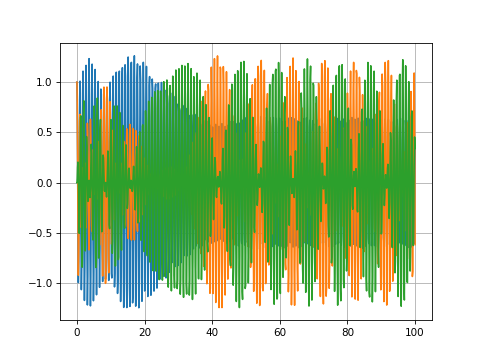

In [3]:
from scipy.integrate import RK45 as RK45
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d



M = SuperModes.M
print(M.shape, SuperModes.Geometry.ITRList[1:].shape)  
MInterp = interp1d(SuperModes.ITR[1:], M, kind='cubic', fill_value='extrapolate')    

Length = 100
z      = np.linspace(1, 3*Length, 100) 
zProfile = interp1d(z, np.exp(-z/Length), kind='cubic', fill_value='extrapolate')     


def propagate(t, y):
    ITR = zProfile(t)
    return 1j*MInterp(ITR).dot(y)
    
input = np.array([1,1,0]).astype(np.complex)

Integral = solve_ivp(fun=propagate, y0=input, t_span=(0,Length))


%matplotlib notebook
plt.plot(Integral.t,np.real(Integral.y[0]),'-')
plt.plot(Integral.t,np.real(Integral.y[1]),'-')
plt.plot(Integral.t,np.real(Integral.y[2]),'-')
plt.grid()


In [29]:
np.real( Integral.y[:,-1] )



array([ 0.43531064, -0.61524897,  0.33958166])